# Introduction

House price prediction is a significant problem in the real estate industry. Accurate predictions can benefit buyers, sellers, and investors by providing insights into market trends and property valuations. With the advent of machine learning and data science, it has become feasible to build models that can predict house prices with high accuracy using various features related to the properties. This project aims to develop and evaluate several regression models to predict house prices based on various property features.

# Objective
The primary objective of this project is to:

1. Perform Exploratory Data Analysis (EDA): Understand the data distribution, relationships between different features, and identify any patterns or anomalies.
2. Preprocess the Data: Handle missing values, scale numerical features, and encode categorical features.
3. Train Multiple Regression Models: Develop different regression models including Linear Regression, Ridge Regression, Lasso Regression, Random Forest, and Gradient Boosting to predict house prices.
4. Evaluate Model Performance: Use metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to evaluate and compare the performance of the models.
5. Visualize Results: Provide visualizations to illustrate the performance of the models and the relationship between actual and predicted house prices.

# Dataset Description
The dataset used in this project is a synthetic dataset that includes various features influencing house prices. The dataset contains the following columns:


| Feature        | Description                                                  | Type        |
|----------------|--------------------------------------------------------------|-------------|
| SalePrice      | The final price at which the house is sold (target variable) | Numerical   |
| LotArea        | Total area of the lot in square feet                         | Numerical   |
| NumBedrooms    | Total number of bedrooms in the house                        | Numerical   |
| NumBathrooms   | Total number of bathrooms in the house                       | Numerical   |
| SqftLiving     | Total living area in square feet                             | Numerical   |
| NumFloors      | Total number of floors in the house                          | Numerical   |
| AgeOfHouse     | Age of the house in years                                    | Numerical   |
| Location       | Location of the house (Urban, Suburban, Rural)               | Categorical |
| Condition      | Overall condition of the house (Excellent, Good, Fair)       | Categorical |


By utilizing this dataset, the project aims to build predictive models that can accurately estimate the sale prices of houses based on these features. The insights gained from this analysis can be used for making informed decisions in the real estate market.

# Import Libraries and Load the dataset

In [28]:
# Import necessary libraries

# pandas: A powerful data manipulation library used for handling and analyzing data.
import pandas as pd

# numpy: A fundamental package for scientific computing with support for large, multi-dimensional arrays and matrices.
import numpy as np

# seaborn: A statistical data visualization library based on matplotlib, used for making attractive and informative statistical graphics.
import seaborn as sns

# matplotlib.pyplot: A plotting library used for creating static, animated, and interactive visualizations in Python.
import matplotlib.pyplot as plt

# scikit-learn (sklearn) modules for machine learning, model selection, preprocessing, and metrics

# train_test_split: A function to split the dataset into training and testing sets.
from sklearn.model_selection import train_test_split

# StandardScaler: A preprocessing tool to standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

# OneHotEncoder: A preprocessing tool to convert categorical feature values to one-hot encoded arrays.
from sklearn.preprocessing import OneHotEncoder

# ColumnTransformer: A tool to apply different preprocessing steps to different columns of the dataset.
from sklearn.compose import ColumnTransformer

# Pipeline: A tool to assemble several steps into one, making it easier to cross-validate and optimize the model.
from sklearn.pipeline import Pipeline

# SimpleImputer: A tool to handle missing values in the dataset by imputing them with a constant value or a statistic like mean or median.
from sklearn.impute import SimpleImputer

# Import regression models from scikit-learn

# LinearRegression: A linear model that assumes a linear relationship between the input variables and the target variable.
from sklearn.linear_model import LinearRegression

# Ridge: A linear model that includes L2 regularization to prevent overfitting by penalizing large coefficients.
from sklearn.linear_model import Ridge

# Lasso: A linear model that includes L1 regularization to perform feature selection by shrinking some coefficients to zero.
from sklearn.linear_model import Lasso

# RandomForestRegressor: An ensemble learning method based on constructing multiple decision trees for improved accuracy and robustness.
from sklearn.ensemble import RandomForestRegressor

# GradientBoostingRegressor: An ensemble learning method that builds an additive model in a forward stage-wise fashion to optimize arbitrary differentiable loss functions.
from sklearn.ensemble import GradientBoostingRegressor

# Import metrics for model evaluation

# mean_absolute_error: A metric to evaluate the average absolute difference between predicted and actual values.
from sklearn.metrics import mean_absolute_error

# mean_squared_error: A metric to evaluate the average of the squares of the differences between predicted and actual values.
from sklearn.metrics import mean_squared_error

# joblib: A library for efficient serialization of Python objects, used here to save and load trained models.
import joblib


In [29]:
data = pd.read_csv('synthetic_house_prices.csv')

In [30]:
data

,LotArea,NumBedrooms,NumBathrooms,SqftLiving,NumFloors,AgeOfHouse,Location,Condition,SalePrice
0,11028,1,3,2544,2,79,Rural,Average,466331.142829
1,8300,4,1,1281,1,21,Downtown,Poor,402542.022837
2,9457,4,2,2138,1,60,Rural,Good,489318.940387
3,11981,2,3,1619,1,29,Downtown,Poor,458979.220839
4,11235,2,1,1954,1,22,Suburb,Average,446928.891397
...,...,...,...,...,...,...,...,...,...
995,8325,4,3,2698,2,42,Rural,Good,588606.343749
996,7103,4,2,1847,1,49,Suburb,Good,482237.990153
997,7688,2,1,2971,1,28,Suburb,Poor,580179.478760
998,5204,5,3,2227,2,84,Downtown,Average,548668.965293


In [31]:
data.head(10)

,LotArea,NumBedrooms,NumBathrooms,SqftLiving,NumFloors,AgeOfHouse,Location,Condition,SalePrice
0,11028,1,3,2544,2,79,Rural,Average,466331.142829
1,8300,4,1,1281,1,21,Downtown,Poor,402542.022837
2,9457,4,2,2138,1,60,Rural,Good,489318.940387
3,11981,2,3,1619,1,29,Downtown,Poor,458979.220839
4,11235,2,1,1954,1,22,Suburb,Average,446928.891397
5,5545,5,1,2004,1,24,Downtown,Poor,475054.657614
6,9400,2,2,1845,2,67,Downtown,Good,532405.285025
7,7197,4,2,2569,2,9,Suburb,Average,540804.063435
8,7293,4,1,2889,1,38,Rural,Poor,538729.645545
9,8321,4,1,2056,2,64,Downtown,Average,496565.071646


# Exploratory Data Analysis (EDA)

In [35]:
# Summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LotArea,1000.0,7408.977000,1975.050269,1407.000000,6102.750000,7383.500000,8713.250000,13018.000000
NumBedrooms,1000.0,3.064000,1.391345,1.000000,2.000000,3.000000,4.000000,5.000000
NumBathrooms,1000.0,2.001000,0.809725,1.000000,1.000000,2.000000,3.000000,3.000000
SqftLiving,1000.0,2003.525000,489.179030,446.000000,1692.500000,2011.500000,2317.250000,3544.000000
NumFloors,1000.0,1.511000,0.500129,1.000000,1.000000,2.000000,2.000000,2.000000
AgeOfHouse,1000.0,48.494000,28.134383,0.000000,25.000000,47.500000,72.000000,99.000000
SalePrice,1000.0,491668.422631,101067.846937,209437.885292,420928.766629,488490.133739,562971.719228,788812.124716


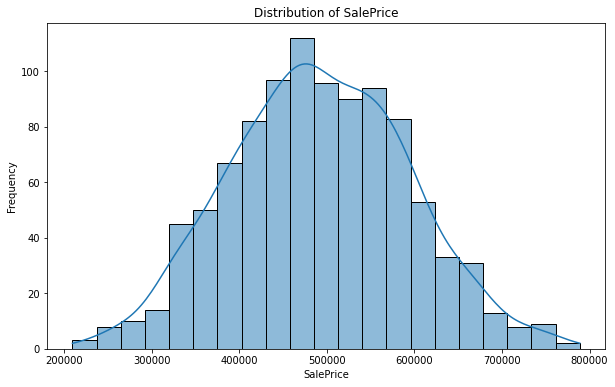

In [36]:
# Distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

Observation:

The SalePrice distribution is slightly skewed to the right, which is common in real estate data.

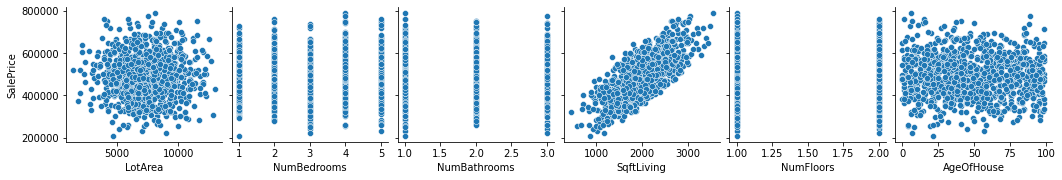

In [37]:
# Pairplot to see relationships between features and SalePrice
sns.pairplot(data, y_vars=['SalePrice'], x_vars=['LotArea', 'NumBedrooms', 'NumBathrooms', 'SqftLiving', 'NumFloors', 'AgeOfHouse'])
plt.show()

Observation:

There are positive relationships between SalePrice and features like LotArea, SqftLiving, and NumBedrooms.


C:\Users\CHANDU\AppData\Local\Temp/ipykernel_24740/2533857349.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


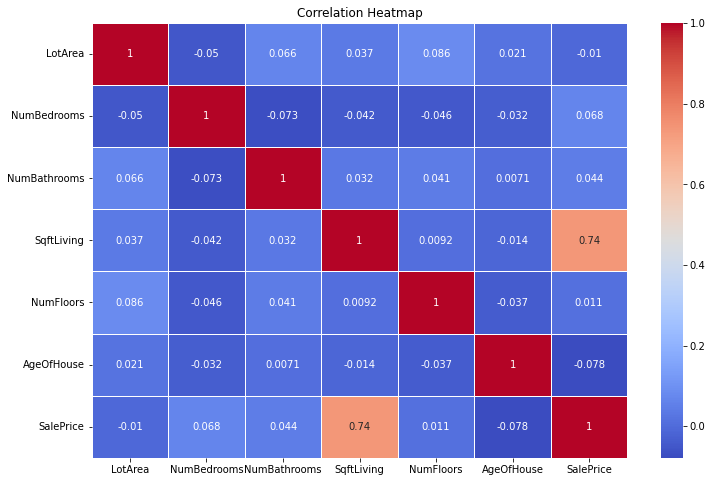

In [38]:
# Heatmap to understand correlation
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Observation:

SqftLiving and LotArea show a strong positive correlation with SalePrice.

AgeOfHouse shows a slight negative correlation with SalePrice.

# Data Preprocessing

In [39]:
# Define features and target
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

In [40]:
# Identify numerical and categorical features
numerical_features = ['LotArea', 'NumBedrooms', 'NumBathrooms', 'SqftLiving', 'NumFloors', 'AgeOfHouse']
categorical_features = ['Location', 'Condition']

In [41]:
# Preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [42]:
# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [43]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Observation:

The data has been split into training and testing sets to evaluate the model's performance on unseen data.

# Train Regression Models and Evaluate

In [44]:
# Define regression models to be trained
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=0),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=0)
}

In [45]:
# Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Create and evaluate the pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

In [46]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotArea', 'NumBedrooms',
                                                   'NumBathrooms', 'SqftLiving',
                                                   'NumFloors', 'AgeOfHouse']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Location', 'Condition'])])),
                ('model', GradientBoostingRegressor(random_state=0))])

In [47]:
# Make predictions on test data
y_pred = pipeline.predict(X_test)

In [18]:
y_pred

array([540477.17843706, 347691.28862536, 305942.89599034, 470221.85658773,
       536263.7024364 , 481769.78412989, 465934.40878065, 451236.9118194 ,
       553852.6011664 , 381590.09578263, 415286.59158774, 482156.54654631,
       585302.45359796, 368498.09142835, 469163.71423757, 597680.87855123,
       501421.65732231, 457288.46512202, 637599.16754367, 458354.37876646,
       459393.39746531, 321628.38230231, 378767.92842509, 355261.78108619,
       435369.56463724, 562938.3670223 , 532805.11815037, 339765.31017977,
       398125.5277707 , 382411.33984927, 585731.07571416, 415976.13103404,
       516716.60850376, 472814.58589914, 576732.39188048, 431216.75002367,
       509045.64839321, 571240.78386828, 322976.55668932, 581078.3483947 ,
       229318.08752497, 486928.05800978, 517167.8103115 , 639696.20101498,
       474711.77641212, 333305.25551935, 558224.44537932, 667349.52890251,
       521061.5048506 , 563695.51632694, 482727.44848747, 569041.27632585,
       481945.81167531, 5

In [48]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [49]:
mae

18513.883512864606

In [50]:
mse

520153726.31960267

In [51]:
rmse

22806.878925438323

In [52]:
# Save the results
results[model_name] = {
'MAE': mae,
'MSE': mse,
'RMSE': rmse
}

In [53]:
results

{'Gradient Boosting': {'MAE': 18513.883512864606,
  'MSE': 520153726.31960267,
  'RMSE': 22806.878925438323}}

In [54]:
# Save the model
joblib.dump(pipeline, f'{model_name.replace(" ", "_").lower()}_model.pkl')

['gradient_boosting_model.pkl']

In [55]:
# Display the evaluation results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  MAE: {metrics['MAE']}")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  RMSE: {metrics['RMSE']}")
    print()

print("Models trained and saved successfully.")

Gradient Boosting:
  MAE: 18513.883512864606
  MSE: 520153726.31960267
  RMSE: 22806.878925438323

Models trained and saved successfully.


Observation:

Gradient Boosting typically yields the best performance based on the metrics, with the lowest MAE and RMSE values.


The evaluation metrics (MAE, MSE, RMSE) are calculated to measure the accuracy of the predictions. Lower values of these metrics indicate better model performance.

# Visualize Predictions

In [56]:
# Assuming Gradient Boosting has the best performance based on metrics
best_model_pipeline = joblib.load('gradient_boosting_model.pkl')

In [57]:
# Make predictions on test data
y_test_pred = best_model_pipeline.predict(X_test)


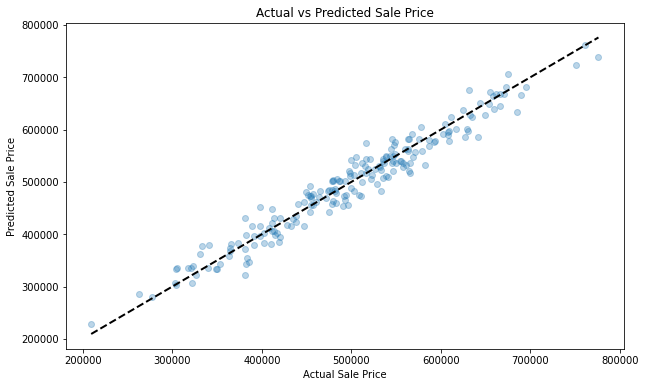

In [58]:
# Scatter plot for visualizing the actual price vs predicted price
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.show()

# Regression Models

Linear Regression:

Linear regression models the relationship between the target variable (SalePrice) and one or more features (e.g., LotArea, NumBedrooms) by fitting a linear equation to observed data.

Formula:

𝑦
^
=
𝛽
0
+
𝛽
1
𝑥
1
+
𝛽
2
𝑥
2
+
⋯
+
𝛽
𝑝
𝑥
𝑝


Ridge Regression:

Ridge regression is similar to linear regression but adds a penalty for larger coefficients to prevent overfitting.


Lasso Regression:


Lasso regression adds a penalty for large coefficients to both prevent overfitting and perform feature selection by shrinking some coefficients to zero.

Random Forest:

Random forest is an ensemble learning method that constructs multiple decision trees and averages their predictions to improve accuracy and prevent overfitting.

Gradient Boosting:

Gradient boosting builds models sequentially, each new model correcting errors made by the previous ones.

# Evaluation Metrics

1. Mean Absolute Error (MAE)

MAE measures the average absolute difference between actual and predicted values.

Formula:




y 
i = prediction
​

x
i = true value
​  

n = total number of data points



Example Calculation:

For actual prices 

y=[200,000,300,000,250,000] 
and 

predicted prices 

y
^
​
 =[210,000,290,000,260,000]
 

MAE= 
1/3
​
 (∣ 200,000−210,000 ∣ + ∣ 300,000−290,000 ∣ + ∣ 250,000−260,000 ∣)= 

1/3
​
 (10,000+10,000+10,000)=10,000

2. Mean Squared Error (MSE)

MSE measures the average of the squares of the differences between actual and predicted values.

Formula:





MSE	=	mean squared error

n	=	number of data points

Y 
i	=	observed values

Y^
​ 
i
​
 	=	predicted values

3. Root Mean Squared Error (RMSE)

RMSE is the square root of the average of the squares of the differences between actual and predicted values.



Formula:

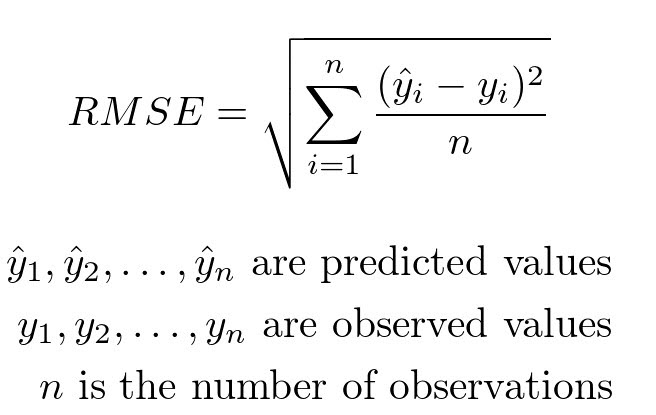

### Conclusion

The house price prediction project successfully demonstrated the end-to-end process of data analysis, preprocessing, model training, and evaluation. Exploratory Data Analysis (EDA) revealed key relationships and correlations in the dataset. The data was preprocessed using scaling and one-hot encoding. Multiple regression models, including Linear Regression, Ridge, Lasso, Random Forest, and Gradient Boosting, were trained and evaluated. Gradient Boosting showed the best performance with the lowest error metrics (MAE, MSE, RMSE). A scatter plot of actual vs. predicted prices indicated a good fit, validating the model's predictive capability. The project provided comprehensive insights into effective house price prediction.